In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("data/lending_club_data.csv")

### Data Preprocessing

In [3]:
data.shape

(396030, 27)

In [4]:
data.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [5]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [8]:
data['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [10]:
data['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [12]:
data['int_rate'].describe()

count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64

### Checking for duplicates

In [8]:
data.duplicated().sum()

0

### Checking null values

In [9]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

### Understanding the data

### Loan Status

In [10]:
data['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

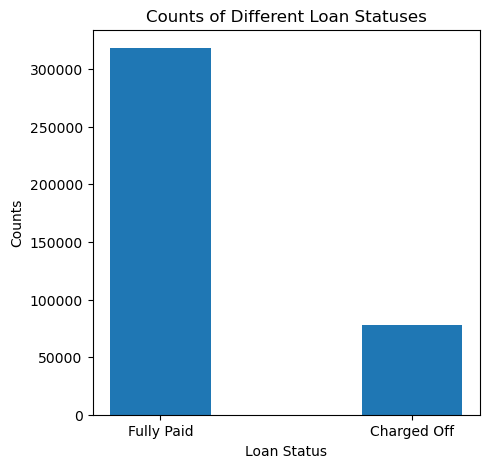

In [11]:
status_counts = data['loan_status'].value_counts()
plt.figure(figsize=(5, 5))
plt.bar(status_counts.index, status_counts.values,width=0.4)
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.title('Counts of Different Loan Statuses')
plt.show()

### Correlation analysis

In [12]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


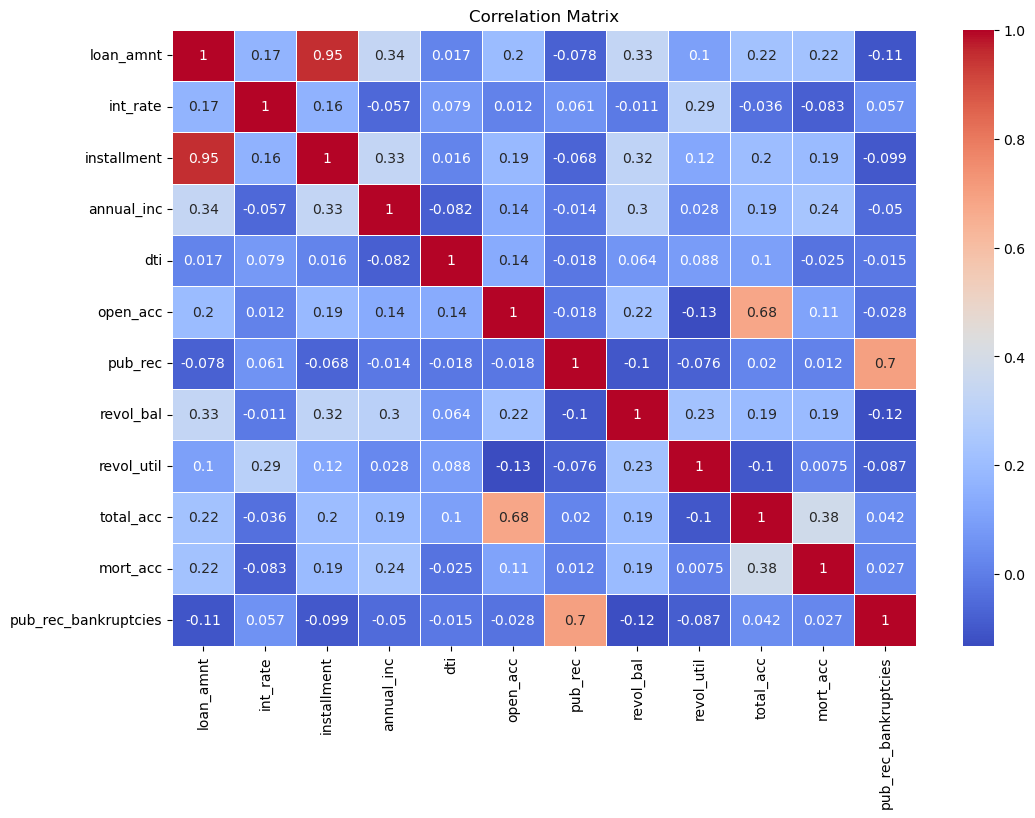

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Here we can see almost perfect correlation between loan amount and installments

In [14]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


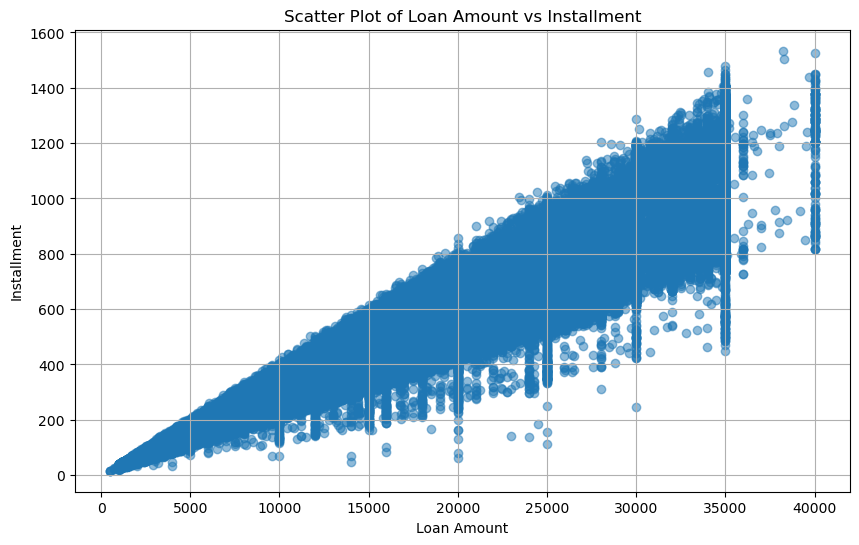

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data['loan_amnt'], data['installment'], alpha=0.5)
plt.title('Scatter Plot of Loan Amount vs Installment')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.grid(True)
plt.show()

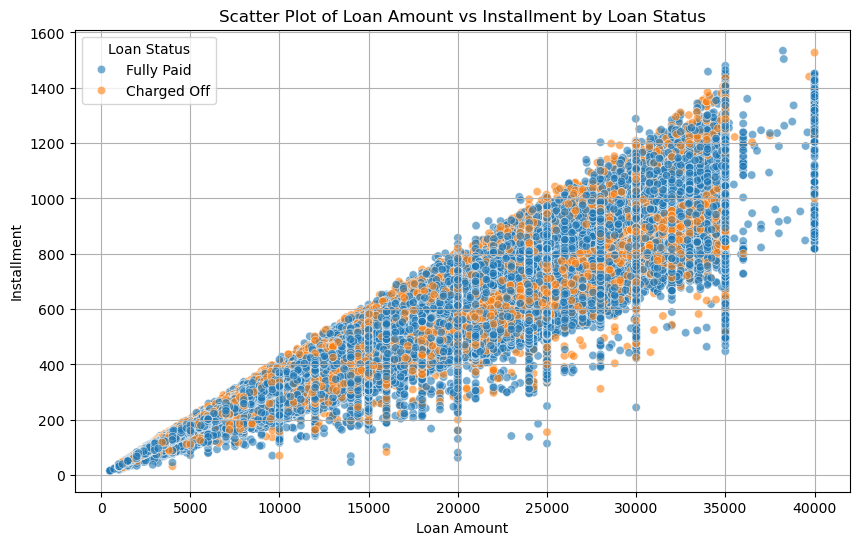

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='loan_amnt', y='installment', hue='loan_status', alpha=0.6)
plt.title('Scatter Plot of Loan Amount vs Installment by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.legend(title='Loan Status')
plt.grid(True)
plt.show()

### Here we can see the optimum installment amount for different levels of loan amount which results in the honor of the debt.

### For grade and sub grade

In [17]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


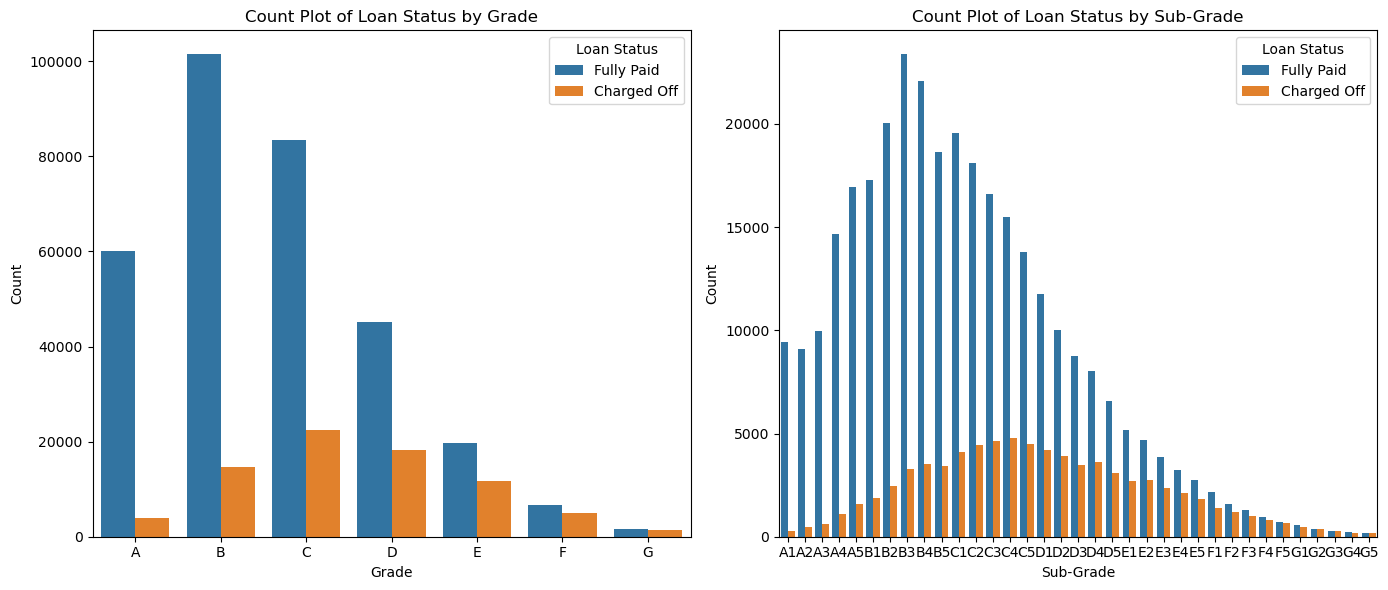

In [18]:
plt.figure(figsize=(14, 6))

grade_order = sorted(data['grade'].unique())
sub_grade_order = sorted(data['sub_grade'].unique())
# Count Plot for Grade vs Loan Status
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='grade', hue='loan_status',order=grade_order)
plt.title('Count Plot of Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Count Plot for Sub-Grade vs Loan Status
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='sub_grade', hue='loan_status',order=sub_grade_order)
plt.title('Count Plot of Loan Status by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

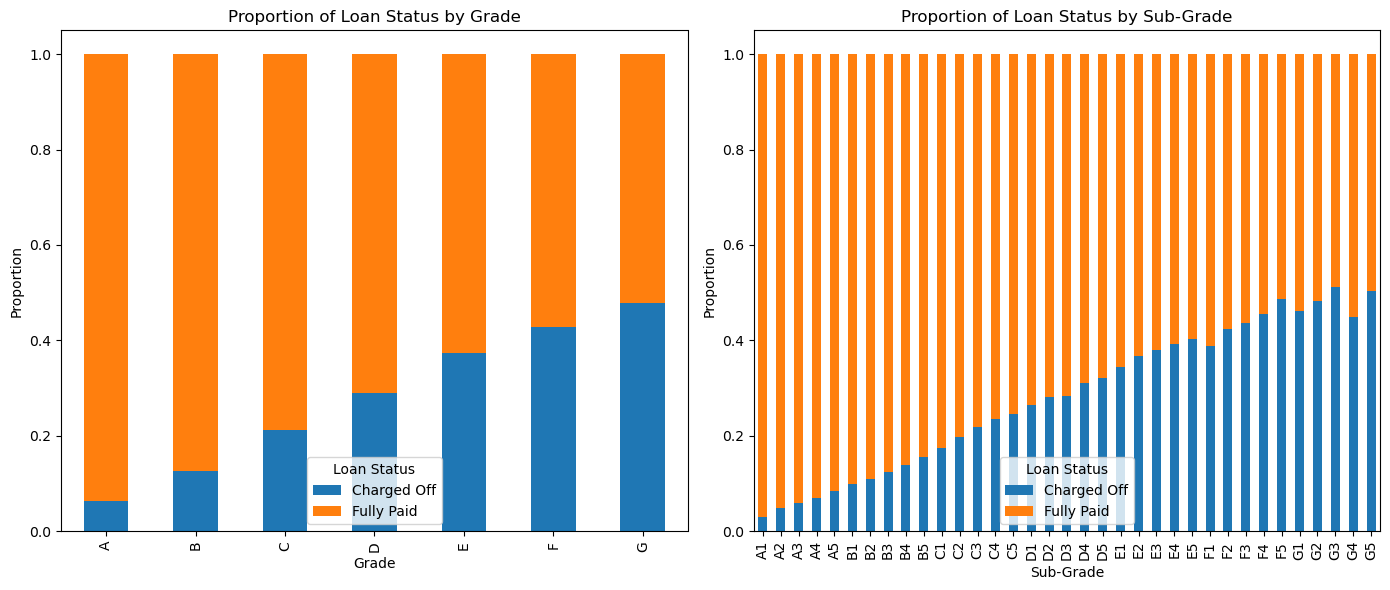

In [19]:
# Calculate the proportions for grade
grade_status_counts = data.groupby(['grade', 'loan_status']).size().unstack().fillna(0)
grade_status_proportions = grade_status_counts.div(grade_status_counts.sum(axis=1), axis=0)

# Calculate the proportions for sub-grade
sub_grade_status_counts = data.groupby(['sub_grade', 'loan_status']).size().unstack().fillna(0)
sub_grade_status_proportions = sub_grade_status_counts.div(sub_grade_status_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 6))

# Bar Plot for Grade vs Loan Status Proportions
plt.subplot(1, 2, 1)
grade_status_proportions.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')

# Bar Plot for Sub-Grade vs Loan Status Proportions
plt.subplot(1, 2, 2)
sub_grade_status_proportions.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Loan Status by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Proportion')
plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

In [20]:
grade_status_proportions

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


In [21]:
sub_grade_status_proportions

loan_status,Charged Off,Fully Paid
sub_grade,,
A1,0.028677,0.971323
A2,0.048186,0.951814
A3,0.058056,0.941944
A4,0.070239,0.929761
A5,0.084908,0.915092
B1,0.098582,0.901418
B2,0.108513,0.891487
B3,0.123354,0.876646
B4,0.138393,0.861607


### For employment title and employment length

In [22]:
data['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64

In [23]:
data['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

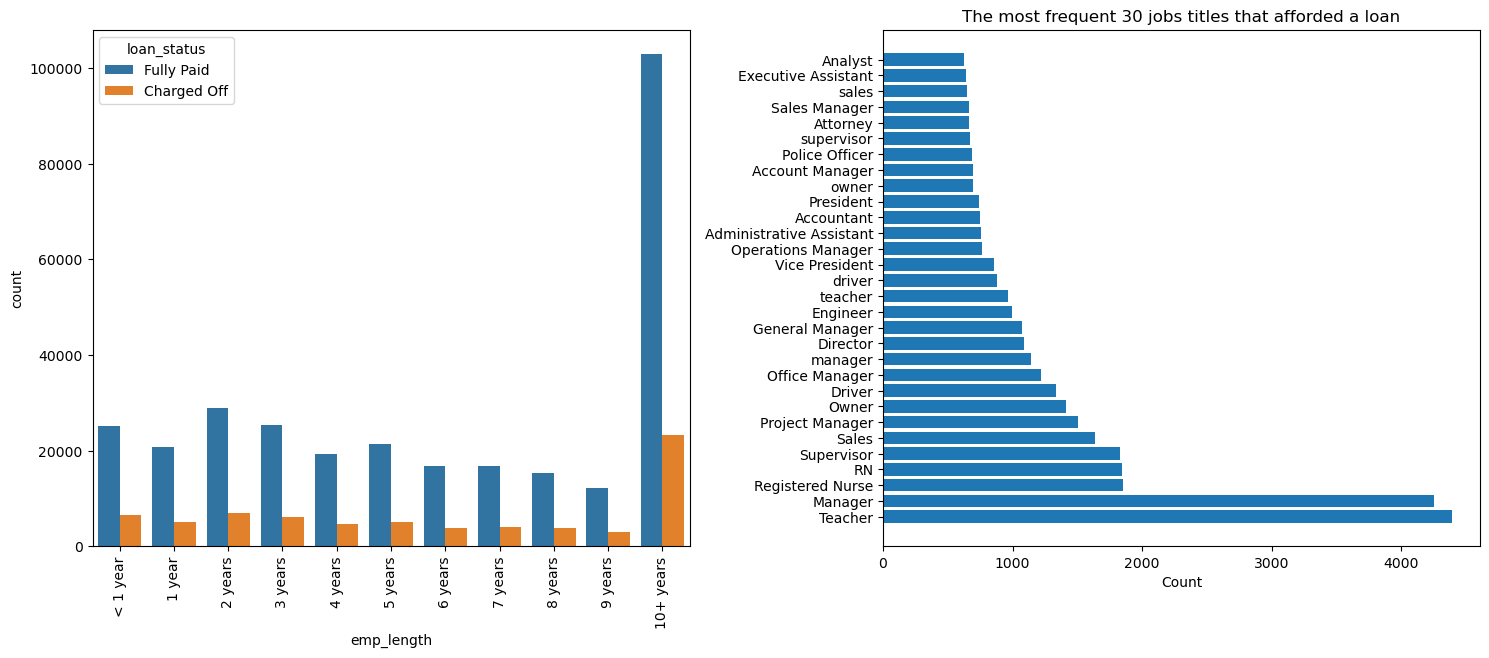

In [24]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most frequent 30 jobs titles that afforded a loan")
plt.xlabel('Count')

plt.tight_layout()

### Visualizing categorical variables like term,home_ownership,verification_status,purpose with the help of countplots

In [25]:
data['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [26]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [27]:
data['verification_status'].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [28]:
data['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

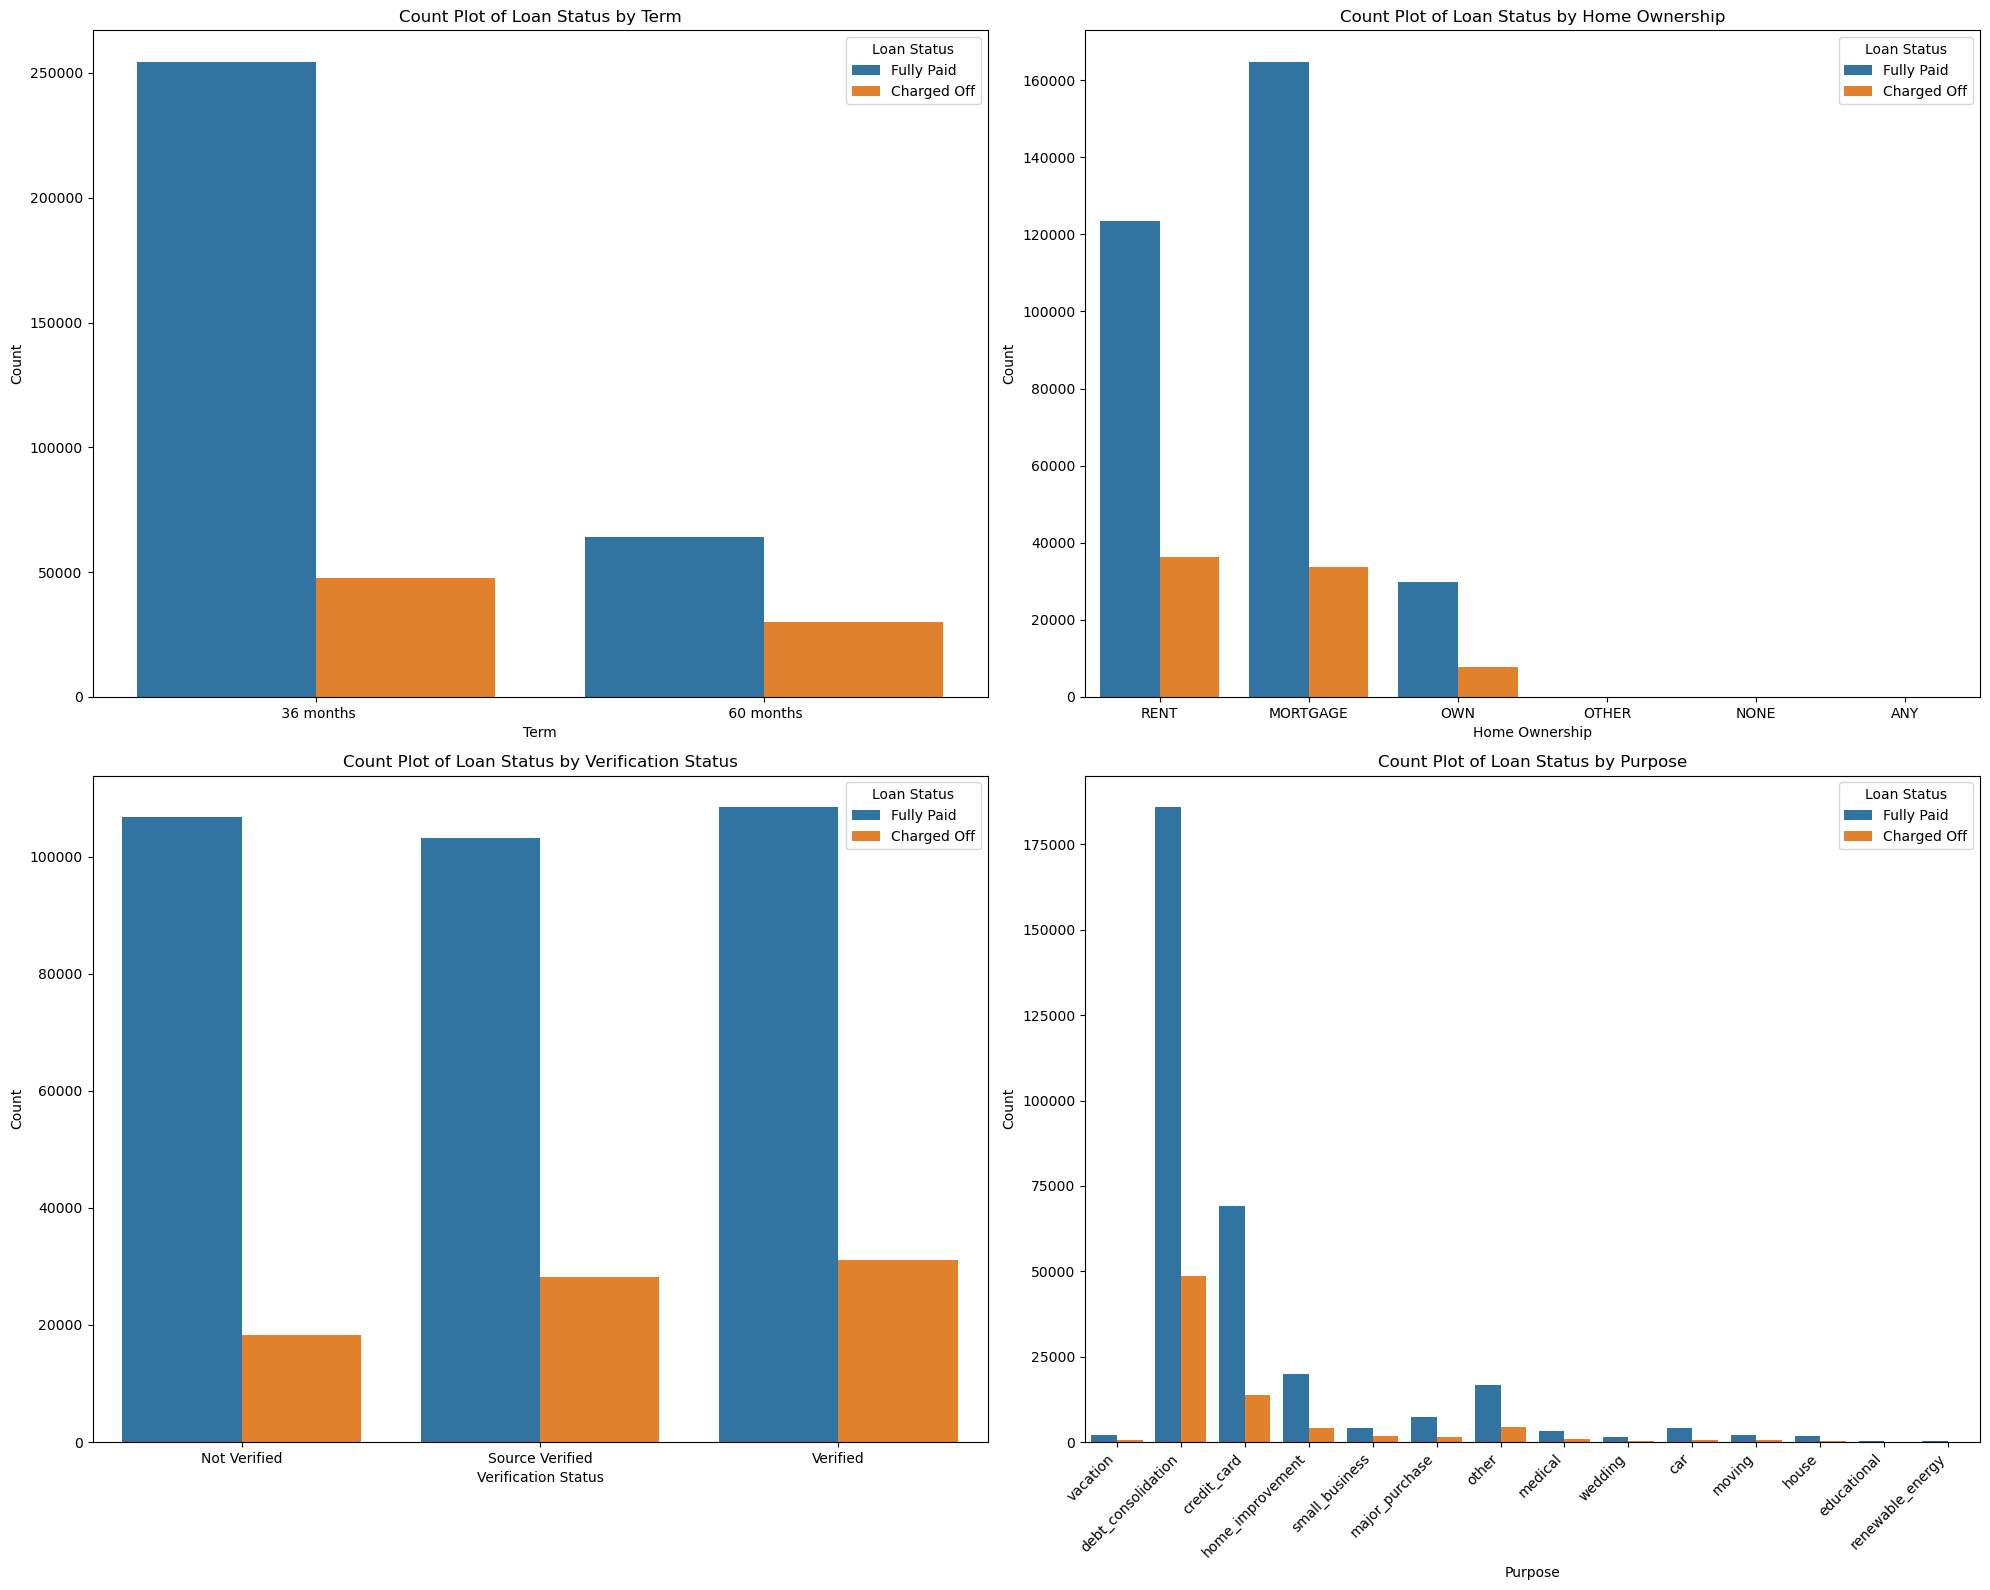

In [29]:
plt.figure(figsize=(20, 16))

# Count Plot for Term vs Loan Status
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='term', hue='loan_status')
plt.title('Count Plot of Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Count Plot for Home Ownership vs Loan Status
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='home_ownership', hue='loan_status')
plt.title('Count Plot of Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Count Plot for Verification Status vs Loan Status
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='verification_status', hue='loan_status')
plt.title('Count Plot of Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Count Plot for Purpose vs Loan Status
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='purpose', hue='loan_status')
plt.title('Count Plot of Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(title='Loan Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### For interest rate

In [30]:
data['int_rate'].value_counts()

int_rate
10.99    12411
12.99     9632
15.61     9350
11.99     8582
8.90      8019
         ...  
14.28        1
18.72        1
18.36        1
30.84        1
24.59        1
Name: count, Length: 566, dtype: int64

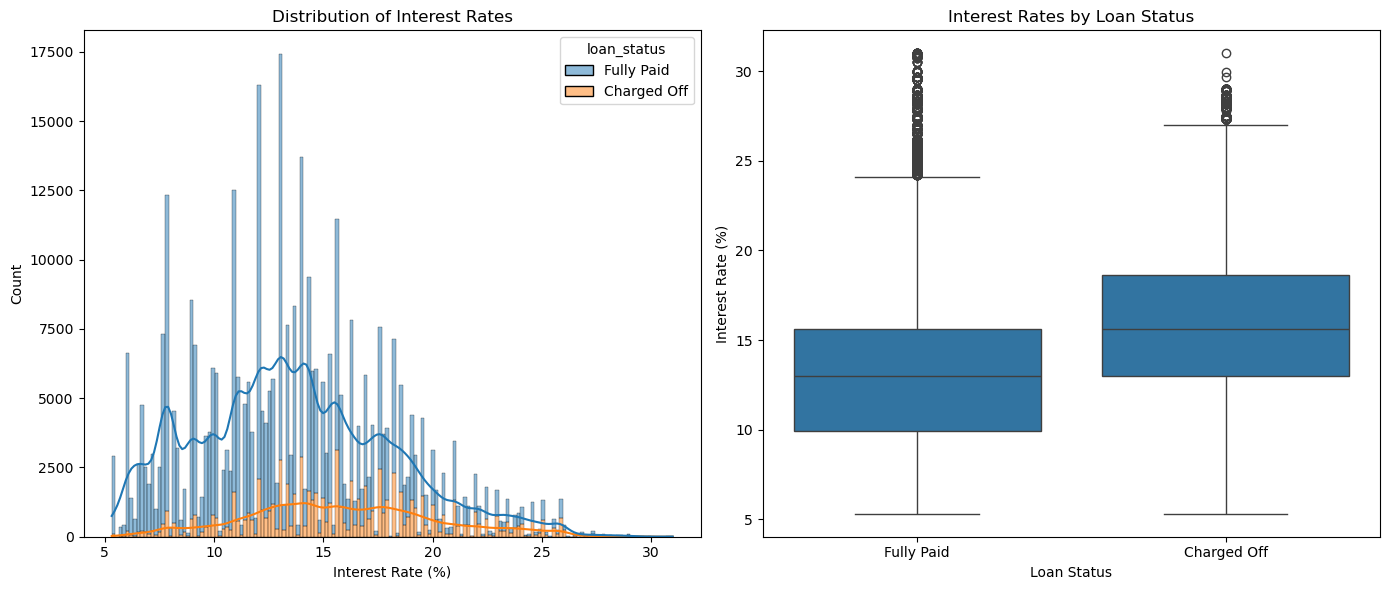

In [31]:
plt.figure(figsize=(14, 6))

# Histogram for Interest Rates
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='int_rate', kde=True, hue='loan_status', multiple='stack')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Count')

# Box Plot for Interest Rates by Loan Status
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='loan_status', y='int_rate')
plt.title('Interest Rates by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')

# Show the plot
plt.tight_layout()
plt.show()

### Here We can see that at higher interest rate, the loans are defaulted more

### For annual income

In [32]:
data['annual_inc']

0         117000.0
1          65000.0
2          43057.0
3          54000.0
4          55000.0
            ...   
396025     40000.0
396026    110000.0
396027     56500.0
396028     64000.0
396029     42996.0
Name: annual_inc, Length: 396030, dtype: float64

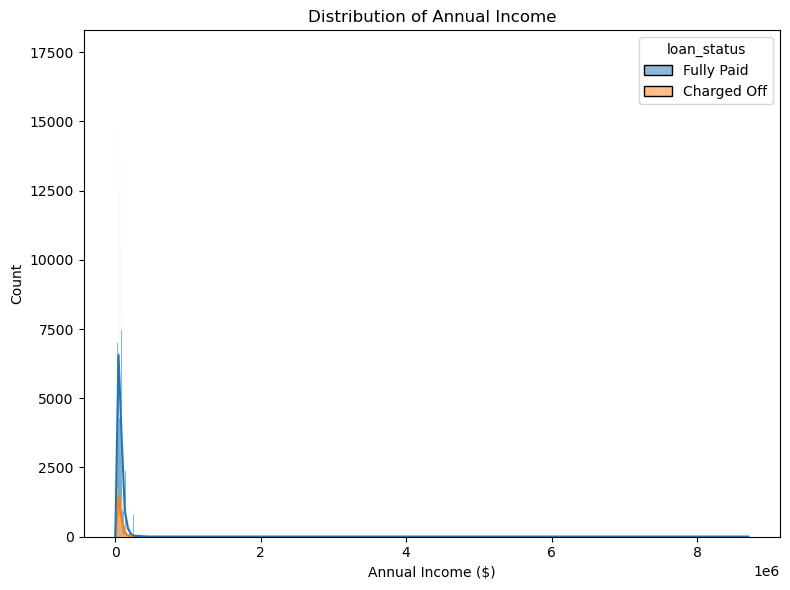

In [33]:
plt.figure(figsize=(8, 6))

# Histogram for Annual Income
sns.histplot(data=data, x='annual_inc', kde=True, hue='loan_status', multiple='stack')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

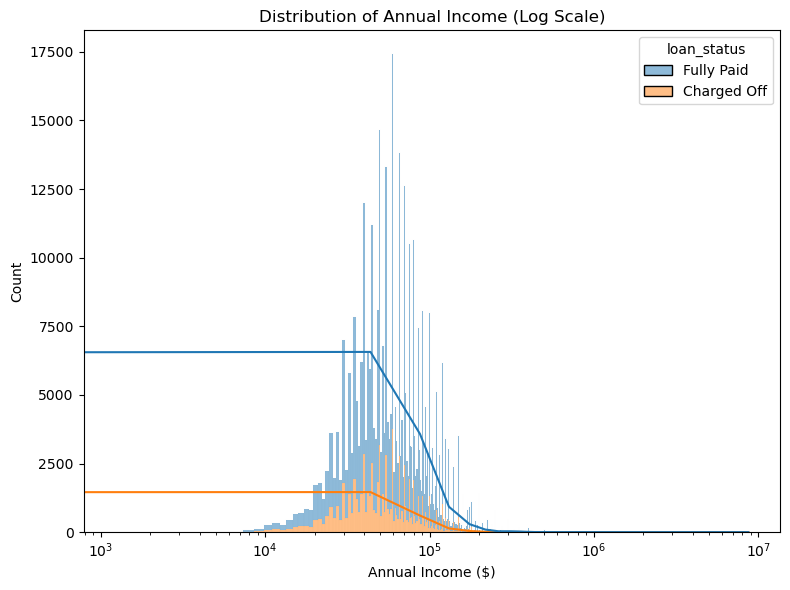

In [34]:
plt.figure(figsize=(8, 6))

# Histogram for Annual Income with log scale
sns.histplot(data=data, x='annual_inc', kde=True, hue='loan_status', multiple='stack')
plt.xscale('log')
plt.title('Distribution of Annual Income (Log Scale)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

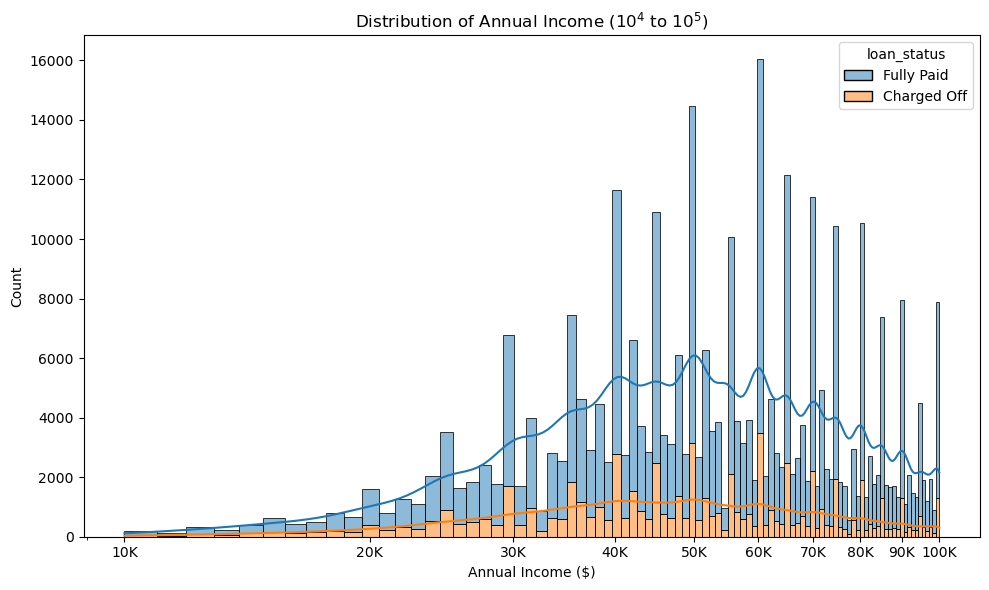

In [35]:
filtered_data = data[(data['annual_inc'] >= 10**4) & (data['annual_inc'] <= 10**5)]

plt.figure(figsize=(10, 6))

# Histogram for Annual Income with the specified range
sns.histplot(data=filtered_data, x='annual_inc', kde=True, hue='loan_status', multiple='stack')
plt.xscale('log')
plt.title('Distribution of Annual Income ($10^4$ to $10^5$)')
plt.xlabel('Annual Income ($)')
plt.ylabel('Count')

x_ticks = [10**4, 2*10**4, 3*10**4, 4*10**4, 5*10**4, 6*10**4, 7*10**4, 8*10**4, 9*10**4, 10**5]
x_labels = ['10K', '20K', '30K', '40K', '50K', '60K', '70K', '80K', '90K', '100K']
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.tight_layout()
plt.show()

In [36]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [37]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3509
Charged Off     568
Name: count, dtype: int64

In [38]:
data.loc[data.annual_inc <= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     315501
Charged Off     77232
Name: count, dtype: int64

In [39]:
data.loc[data.annual_inc == 60000, 'loan_status'].value_counts()

loan_status
Fully Paid     11987
Charged Off     3326
Name: count, dtype: int64

### For issue date and earliest credit line

In [40]:
data['issue_d'].value_counts()

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: count, Length: 115, dtype: int64

In [41]:
data['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [42]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

C:\Users\HP\AppData\Local\Temp\ipykernel_65764\836848778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
C:\Users\HP\AppData\Local\Temp\ipykernel_65764\836848778.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [43]:
data['issue_d']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2014-11-01
4        2013-04-01
            ...    
396025   2015-10-01
396026   2015-02-01
396027   2013-10-01
396028   2012-08-01
396029   2010-06-01
Name: issue_d, Length: 396030, dtype: datetime64[ns]

In [44]:
data['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]

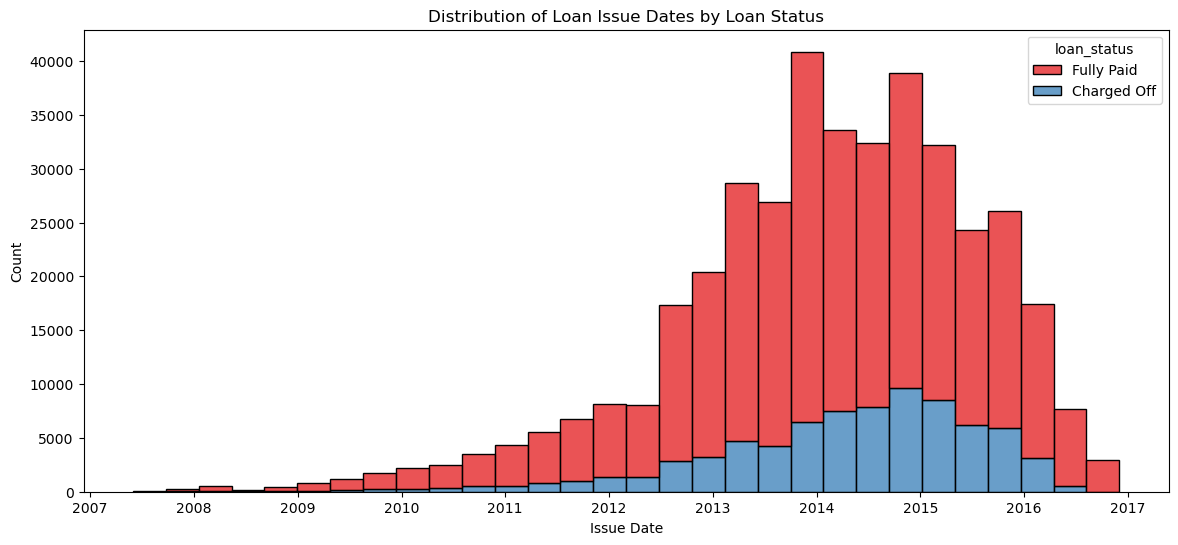

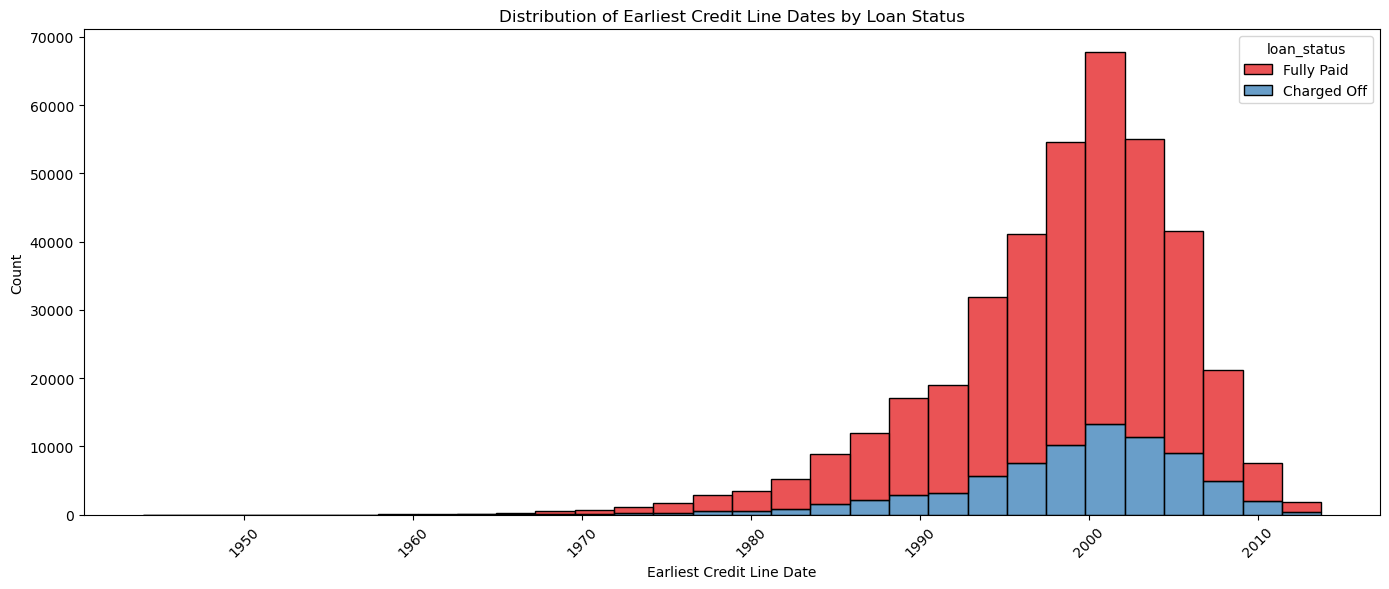

In [45]:
# Plot histograms for issue_d
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='issue_d', hue='loan_status', multiple='stack', palette='Set1', bins=30)
plt.title('Distribution of Loan Issue Dates by Loan Status')
plt.xlabel('Issue Date')
plt.ylabel('Count')

# Plot histograms for earliest_cr_line
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='earliest_cr_line', hue='loan_status', multiple='stack', palette='Set1', bins=30)
plt.title('Distribution of Earliest Credit Line Dates by Loan Status')
plt.xlabel('Earliest Credit Line Date')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For title

In [46]:
data['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [47]:
data['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

### Since the columns look similar and title can be generated from purpose and vice versa. One of the columns can be removed

### For Number of mortgage accounts

In [48]:
data['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

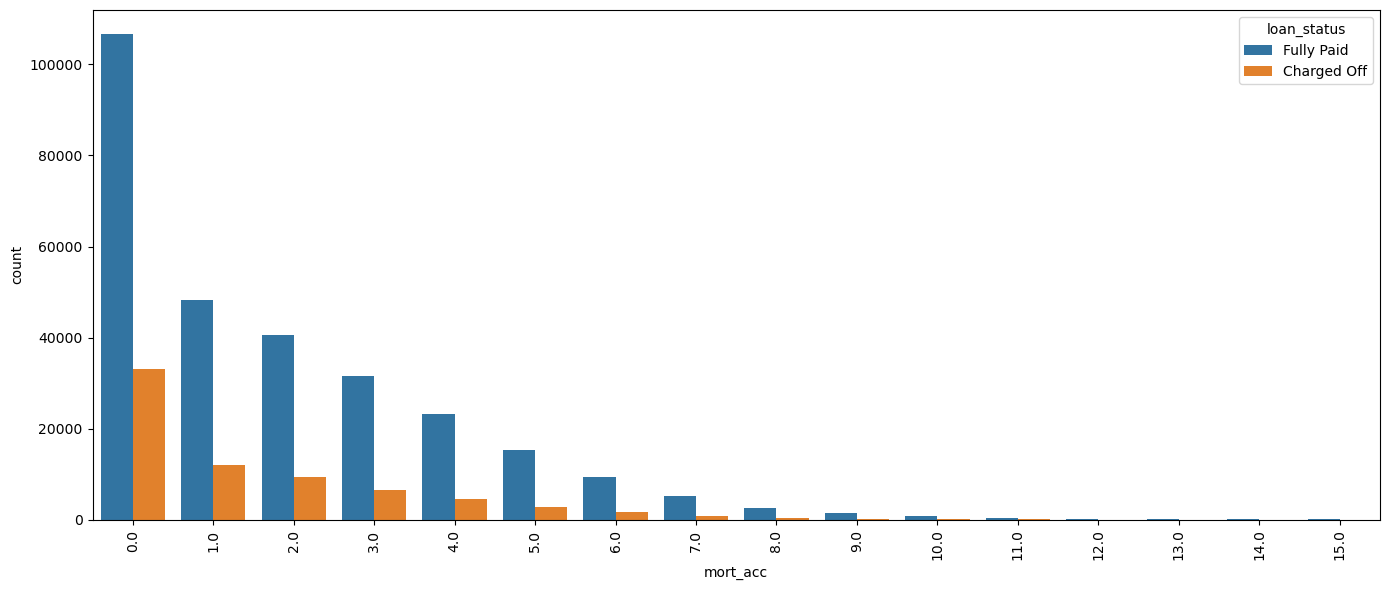

In [49]:
plt.figure(figsize=(14, 6))
order = ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0']
sns.countplot(x='mort_acc', data=data, hue='loan_status', order=order)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

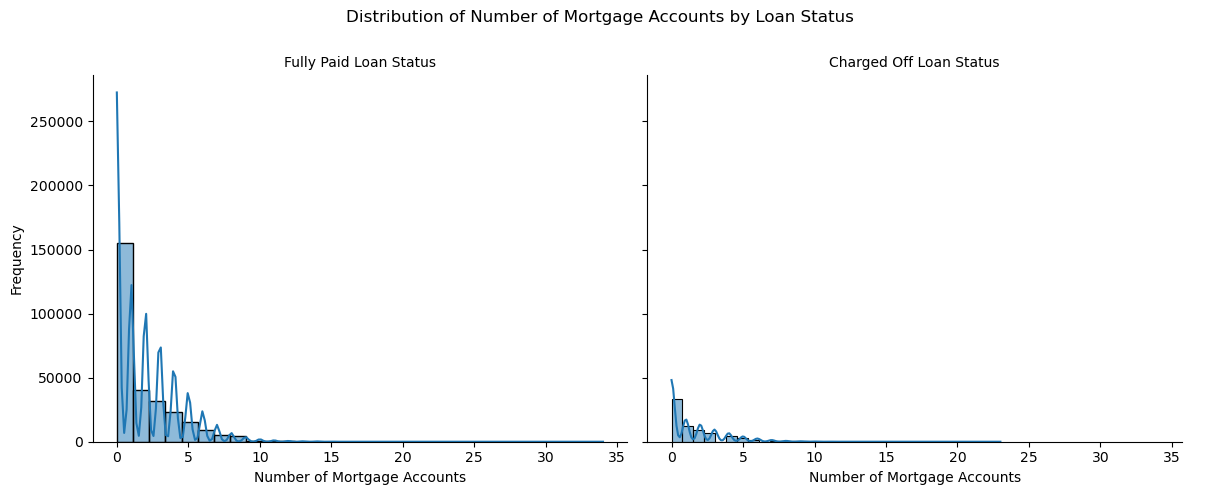

In [50]:
g = sns.FacetGrid(data, col='loan_status', height=5, aspect=1.2)
g.map_dataframe(sns.histplot, x='mort_acc', bins=30, kde=True)
g.set_axis_labels('Number of Mortgage Accounts', 'Frequency')
g.set_titles(col_template="{col_name} Loan Status")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Number of Mortgage Accounts by Loan Status')
plt.show()

### For Application type

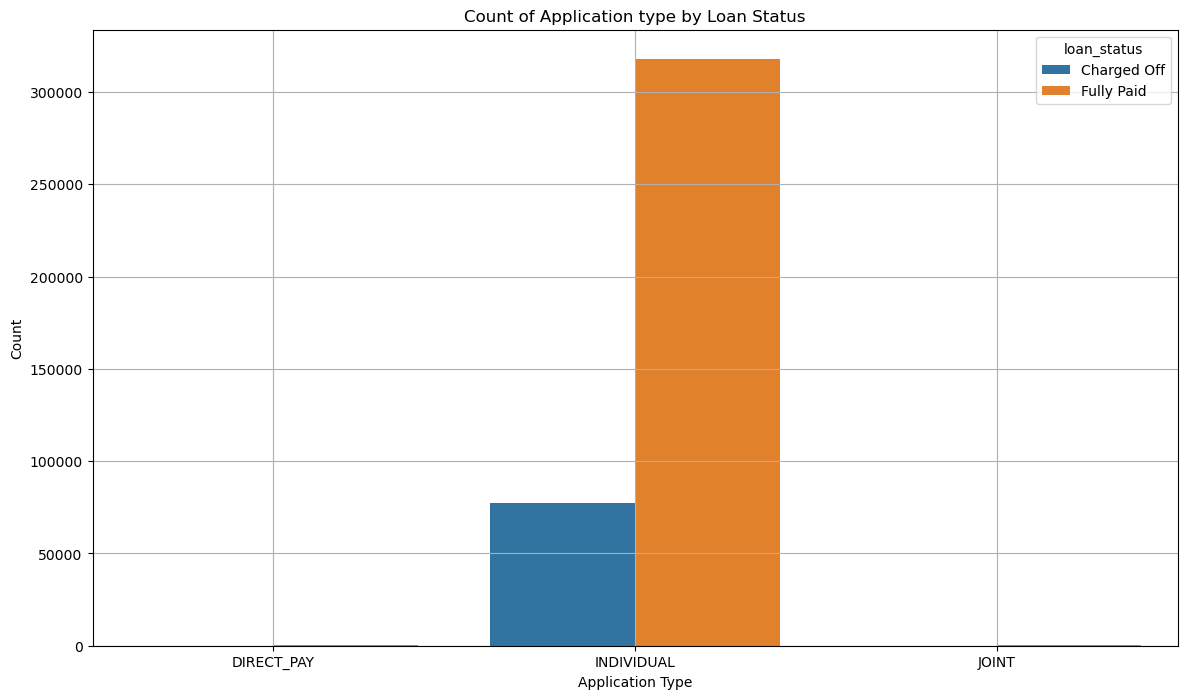

In [51]:
counts = data.groupby(['loan_status', 'application_type']).size().reset_index(name='count')

# Plot the bar chart
plt.figure(figsize=(14, 8))

sns.barplot(data=counts, x='application_type', y='count', hue='loan_status')
plt.title('Count of Application type by Loan Status')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### For public record bankruptcies

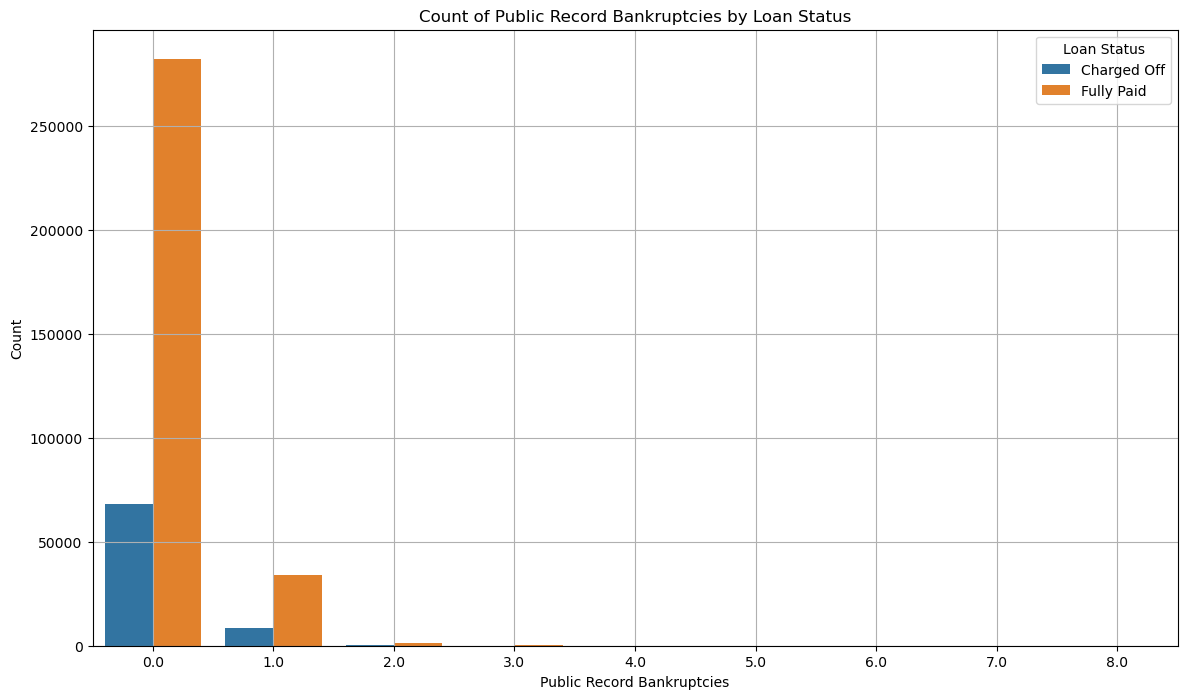

In [52]:
counts = data.groupby(['loan_status', 'pub_rec_bankruptcies']).size().reset_index(name='count')

# Plot the bar chart
plt.figure(figsize=(14, 8))

sns.barplot(data=counts, x='pub_rec_bankruptcies', y='count', hue='loan_status')
plt.title('Count of Public Record Bankruptcies by Loan Status')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.grid(True)
plt.show()

### Data Cleaning

In [53]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [54]:
def findMissing(df):
    return round(df.isna().sum()/df.shape[0]*100,2)

In [55]:
findMissing(data)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

### Dropping the title column as it has null values but purpose has no null values

In [56]:
data.drop('title', axis=1, inplace=True)

In [57]:
data[data.revol_util.isna()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
1686,2150.0,36 months,11.14,70.54,B,B2,ASCD,< 1 year,MORTGAGE,50000.0,...,2.0,0.0,0.0,NaN,21.0,w,INDIVIDUAL,3.0,0.0,77373 Mendoza Causeway Suite 785\r\nGibsonhave...
3019,5000.0,36 months,13.79,170.38,C,C5,Betty Bacharach Rehabilitation Hospital,< 1 year,RENT,45000.0,...,8.0,0.0,0.0,NaN,11.0,f,INDIVIDUAL,NaN,0.0,"555 Smith Meadows Apt. 429\r\nBryanfurt, TN 05113"
4931,8000.0,36 months,13.67,272.15,B,B5,freight crew,2 years,RENT,30000.0,...,2.0,0.0,0.0,NaN,15.0,w,INDIVIDUAL,0.0,0.0,"PSC 6735, Box 8380\r\nAPO AE 30723"
5382,7000.0,36 months,12.99,235.83,B,B4,Teacher,10+ years,MORTGAGE,61000.0,...,2.0,0.0,0.0,NaN,32.0,f,INDIVIDUAL,5.0,0.0,826 Glover Spring Suite 979\r\nNorth Amandashi...
9016,8000.0,36 months,12.12,266.18,B,B3,Federal Bureau of Prisons,3 years,RENT,49000.0,...,10.0,0.0,0.0,NaN,18.0,f,INDIVIDUAL,0.0,0.0,"16908 Taylor Valley Suite 815\r\nBuchananfort,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385222,11200.0,60 months,20.20,297.98,E,E3,Physician,< 1 year,RENT,150000.0,...,6.0,0.0,0.0,NaN,24.0,w,INDIVIDUAL,0.0,0.0,"164 Nicole Roads Suite 229\r\nPort Tylerfurt, ..."
388426,6000.0,36 months,11.44,197.69,B,B4,Mortgage Loan Processor,10+ years,MORTGAGE,31000.0,...,1.0,0.0,0.0,NaN,9.0,w,INDIVIDUAL,2.0,0.0,"315 Samuel Valley\r\nLongberg, AR 30723"
390665,35000.0,60 months,17.56,880.42,D,D1,Ramsey Asset Management,4 years,MORTGAGE,280000.0,...,6.0,0.0,127137.0,NaN,12.0,f,INDIVIDUAL,3.0,0.0,"51677 Cooper Squares\r\nPort Angelton, CT 93700"
395088,8000.0,36 months,19.42,294.95,E,E3,Medline Industries Inc,3 years,RENT,30000.0,...,6.0,0.0,0.0,NaN,10.0,f,INDIVIDUAL,NaN,0.0,"79018 Teresa Brooks Apt. 529\r\nSouth Julie, I..."


In [58]:
data['revol_util']

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [59]:
data['revol_util'].fillna(data['revol_util'].mean(), inplace=True)

In [60]:
findMissing(data)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.00
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [61]:
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [62]:
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])

### For employment title and length 

In [63]:
data['emp_title'] = data['emp_title'].fillna(data['emp_title'].mode()[0])

In [64]:
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])

### For mortgage accounts

In [65]:
data['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [66]:
data['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [67]:
data['mort_acc'] = data['mort_acc'].fillna(data['mort_acc'].mode()[0])

### Final checking for null values

In [68]:
data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### Since there are no null values remaining, we can proceed to the next step.

### Handling outliers

In [69]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,2014-02-02 15:57:58.045602560,17.379514,1998-05-03 09:34:15.062495488,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.640873,0.121483
min,500.000000,5.320000,16.080000,0.000000e+00,2007-06-01 00:00:00,0.000000,1944-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,2013-05-01 00:00:00,11.280000,1994-10-01 00:00:00,8.000000,0.000000,6.025000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,2014-04-01 00:00:00,16.910000,1999-09-01 00:00:00,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,2015-03-01 00:00:00,22.980000,2003-04-01 00:00:00,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,2016-12-01 00:00:00,9999.000000,2013-10-01 00:00:00,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000
std,8357.441341,4.472157,250.727790,6.163762e+04,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.443671,11.886991,2.111249,0.355962


### Encoding

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             396030 non-null  object        
 7   emp_length            396030 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

In [71]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col)

term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
loan_status
purpose
initial_list_status
application_type
address


In [72]:
categorical_columns_label = ['term', 'grade', 'sub_grade', 'emp_length', 'verification_status', 'application_type'
                             ,'emp_title', 'home_ownership', 'loan_status', 'purpose', 'initial_list_status','city']

In [73]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col)

term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
loan_status
purpose
initial_list_status
application_type
address


In [74]:
# Since we won't know the issue date beforehand, we drop the column.
data.drop('issue_d', axis=1, inplace=True)

In [75]:
data['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [76]:
def extract_city(address):
    # Split the address into lines
    parts = address.split('\r\n')
    if len(parts) > 1:
        # Extract city from the second part before the comma
        city_state_zip = parts[1].strip()
        city = city_state_zip.split(',')[0].strip()
        return city
    return None

# Apply the function to the address column
data['city'] = data['address'].apply(extract_city)

# Display the result
print(data[['address', 'city']])

                                                  address           city
0          0174 Michelle Gateway\r\nMendozaberg, OK 22690    Mendozaberg
1       1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113     Loganmouth
2       87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113    New Sabrina
3                 823 Reid Ford\r\nDelacruzside, MA 00813   Delacruzside
4                  679 Luna Roads\r\nGreggshire, VA 11650     Greggshire
...                                                   ...            ...
396025   12951 Williams Crossing\r\nJohnnyville, DC 30723    Johnnyville
396026  0114 Fowler Field Suite 028\r\nRachelborough, ...  Rachelborough
396027  953 Matthew Points Suite 414\r\nReedfort, NY 7...       Reedfort
396028  7843 Blake Freeway Apt. 229\r\nNew Michael, FL...    New Michael
396029      787 Michelle Causeway\r\nBriannaton, AR 48052     Briannaton

[396030 rows x 2 columns]


In [77]:
data.drop('address',axis=1,inplace=True)

In [78]:
# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each column
for col in categorical_columns_label:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [81]:
data.to_csv('withoutScaling.csv', index=False)

### Scaling the data

In [82]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,city
0,10000.0,0,11.44,329.48,1,8,80956,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,28584
1,8000.0,0,11.99,265.68,1,9,33317,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,26621
2,15600.0,0,10.49,506.97,1,7,127182,10,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,34634
3,7200.0,0,6.49,220.65,0,1,27760,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,6299
4,24375.0,1,17.27,609.33,2,14,38300,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,15388


In [83]:
numerical_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns
scaler = StandardScaler()

# Fit and transform the numerical data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print(data)

        loan_amnt      term  int_rate  installment     grade  sub_grade  \
0       -0.492243 -0.557975 -0.491799    -0.408291 -0.616534  -0.467127   
1       -0.731551 -0.557975 -0.368816    -0.662750 -0.616534  -0.315634   
2        0.177819 -0.557975 -0.704225     0.299609 -0.616534  -0.618620   
3       -0.827274 -0.557975 -1.598649    -0.842348 -1.366267  -1.527580   
4        1.227783  1.792196  0.811824     0.707861  0.133200   0.441833   
...           ...       ...       ...          ...       ...        ...   
396025  -0.492243  1.792196 -0.592422    -0.855390 -0.616534  -0.467127   
396026   0.823951 -0.557975 -0.301734     1.071164  0.133200  -0.164140   
396027  -1.090513 -0.557975 -0.816028    -1.078979 -0.616534  -0.921607   
396028   0.823951  1.792196  0.373556     0.283855  0.133200  -0.012647   
396029  -1.449475 -0.557975 -0.006574    -1.451256  0.133200  -0.012647   

        emp_title  emp_length  home_ownership  annual_inc  ...  open_acc  \
0       -0.194317   -0.

In [84]:
data.to_csv('processed.csv', index=False)